In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:
df = pd.read_csv('./data/labeled_data.csv')

In [54]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Yes votes per bill for democrats and republicans

In [55]:
# make yes votes 1 and other votes 0
df_yes = df.applymap(lambda x: int('1') if x =='y' else int('0'))

In [56]:
df_yes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [57]:
# drop the binarized party column
df_yes.drop(columns = ['party'], inplace=True)

In [58]:
# put the party names onto the dataframe for graphing
df_yes['party'] = df['party']

In [59]:
df_yes.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,party
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,republican
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,democrat


In [60]:
# get sums for yes votes for graphing
df_yes_sum = df_yes.groupby(by='party').sum().T
df_yes_sum

party,democrat,republican
handicapped-infants,156,31
water-project-cost-sharing,120,75
adoption-of-the-budget-resolution,231,22
physician-fee-freeze,14,163
el-salvador-aid,55,157
religious-groups-in-schools,123,149
anti-satellite-test-ban,200,39
aid-to-nicaraguan-contras,218,24
mx-missile,188,19
immigration,124,92


### Make Graph
- (referred to https://www.python-graph-gallery.com/12-stacked-barplot-with-matplotlib)

In [61]:
# data for graph
bars1 = df_yes_sum['democrat'].tolist()
bars2 = df_yes_sum['republican'].tolist()
bar_height = np.add(bars1, bars2).tolist()

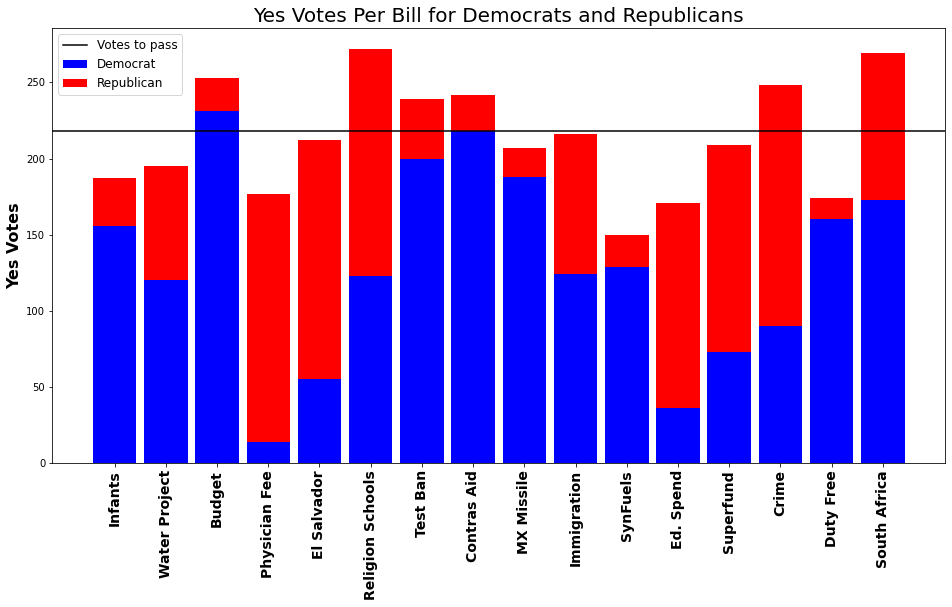

In [62]:
# position of bars on x axis
r = list(range(16))

# Names of group and bar width
names = ['Infants','Water Project','Budget','Physician Fee','El Salvador', 'Religion Schools', 
        'Test Ban', 'Contras Aid', 'MX Missile', 'Immigration', 'SynFuels', 'Ed. Spend', 'Superfund', 
        'Crime', 'Duty Free', 'South Africa']
barWidth = 0.85

# Set figure size
plt.figure(figsize=(16,8))

# plot the two bars
plt.bar(r, bars1, color='b', width=barWidth, label='Democrat')
plt.bar(r, bars2, bottom=bars1, color='r', width=barWidth, label='Republican')

# Put the names on the x axis
plt.xticks(r, names, fontweight='bold', rotation=90, fontsize=14)
plt.ylabel('Yes Votes', fontsize=16, fontweight='bold')

# horizontal line at number of votes to pass bill
plt.axhline(y=218, label='Votes to pass', color='k')

plt.legend(loc='upper left', fontsize=12)
plt.title('Yes Votes Per Bill for Democrats and Republicans', fontsize=20)
plt.show()

#### Conclusions
- Only 6 of these bills passed! I triple checked that 218 was the cutoff, there were 435 congressmembers in this dataset and 218 is a majority.
- For most of these bills, most of the yes votes are from Democrats, the majority party
- Clearly, congress worked differently during this time. Many of these key votes have significant bipartisan support, although there is enough of a partisan split to create a good model based on a few of the bills.

## Unknown votes per bill for democrats and republicans

In [63]:
# make unknown votes 1 and other votes 0
df_question = df.applymap(lambda x: int('1') if x =='?' else int('0'))

In [64]:
df_question.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
# drop the binarized party column
df_question.drop(columns = ['party'], inplace=True)

In [66]:
# put the party names onto the dataframe for graphing
df_question['party'] = df['party']

In [67]:
df_question.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,party
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,republican
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,republican
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,democrat
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,democrat
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,democrat


In [68]:
# get sums for unknown votes for graphing
df_question_sum = df_question.groupby(by='party').sum().T
df_question_sum

party,democrat,republican
handicapped-infants,9,3
water-project-cost-sharing,28,20
adoption-of-the-budget-resolution,7,4
physician-fee-freeze,8,3
el-salvador-aid,12,3
religious-groups-in-schools,9,2
anti-satellite-test-ban,8,6
aid-to-nicaraguan-contras,4,11
mx-missile,19,3
immigration,4,3


### Make Graph
- (referred to https://www.python-graph-gallery.com/12-stacked-barplot-with-matplotlib)

In [69]:
# data for graph
bars1 = df_question_sum['democrat'].tolist()
bars2 = df_question_sum['republican'].tolist()
bar_height = np.add(bars1, bars2).tolist()

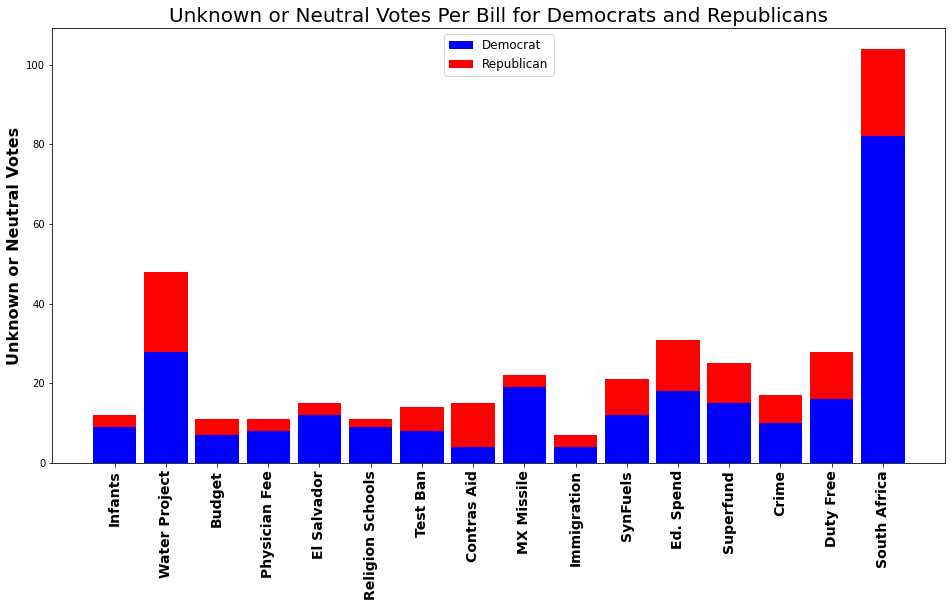

In [70]:
# position of bars on x axis
r = list(range(16))

# Names of group and bar width
names = ['Infants','Water Project','Budget','Physician Fee','El Salvador', 'Religion Schools', 
        'Test Ban', 'Contras Aid', 'MX Missile', 'Immigration', 'SynFuels', 'Ed. Spend', 'Superfund', 
        'Crime', 'Duty Free', 'South Africa']
barWidth = 0.85

# Set figure size
plt.figure(figsize=(16,8))

# plot the two bars
plt.bar(r, bars1, color='b', width=barWidth, label='Democrat')
plt.bar(r, bars2, bottom=bars1, color='r', width=barWidth, label='Republican')

# Put the names on the x axis
plt.xticks(r, names, fontweight='bold', rotation=90, fontsize=14)
plt.ylabel('Unknown or Neutral Votes', fontsize=16, fontweight='bold')

plt.legend(loc='upper center', fontsize=12)
plt.title('Unknown or Neutral Votes Per Bill for Democrats and Republicans', fontsize=20)
plt.show()

**Analysis**: The water project cost sharing and South Africa bills have the most unknown votes. As expected, Democrats have more unknown votes than Republicans for most bills because there are more Democrats.

## Vote distributions for parties for bills with similar vote distributions identified in the EDA notebook

### Bills with yes somewhat higher than no

<Figure size 432x288 with 0 Axes>

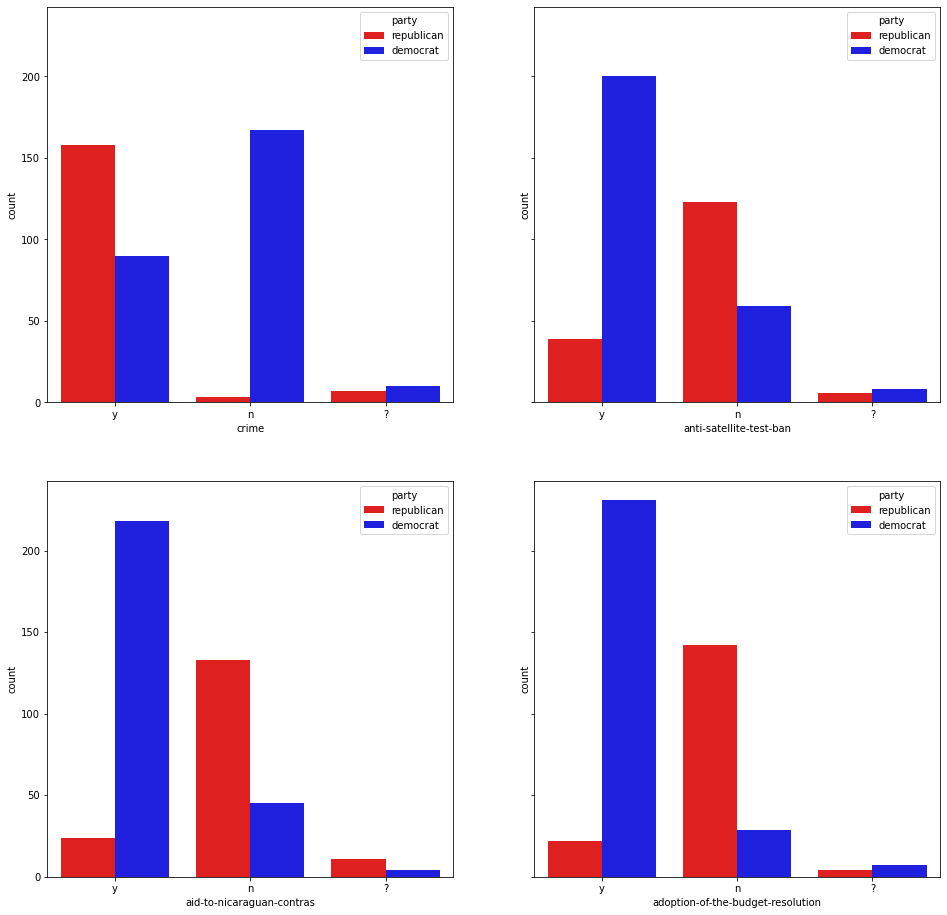

In [20]:
# To make republicans red and democrats blue
colors = ["r", "b"]
sns.set_palette(sns.color_palette(colors))

plt.tight_layout()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16), sharey=True)

# same order of vote type for each graph
o = ['y', 'n', '?']

sns.countplot(ax=axes[0,0],order=o,x="crime", hue="party", data=df)
sns.countplot(ax=axes[1,0],order=o,x="aid-to-nicaraguan-contras", hue="party", data=df)
sns.countplot(ax=axes[0,1],order=o,x="anti-satellite-test-ban", hue="party", data=df)
sns.countplot(ax=axes[1,1],order=o,x="adoption-of-the-budget-resolution", hue="party", data=df)
plt.show()

**Conclusion**: The Democrats have the majority. As expected, these are mostly bills with a partisan split supported by Democrats, although the crime bill was an exception.

### Bills with close yes and no vote totals

<Figure size 432x288 with 0 Axes>

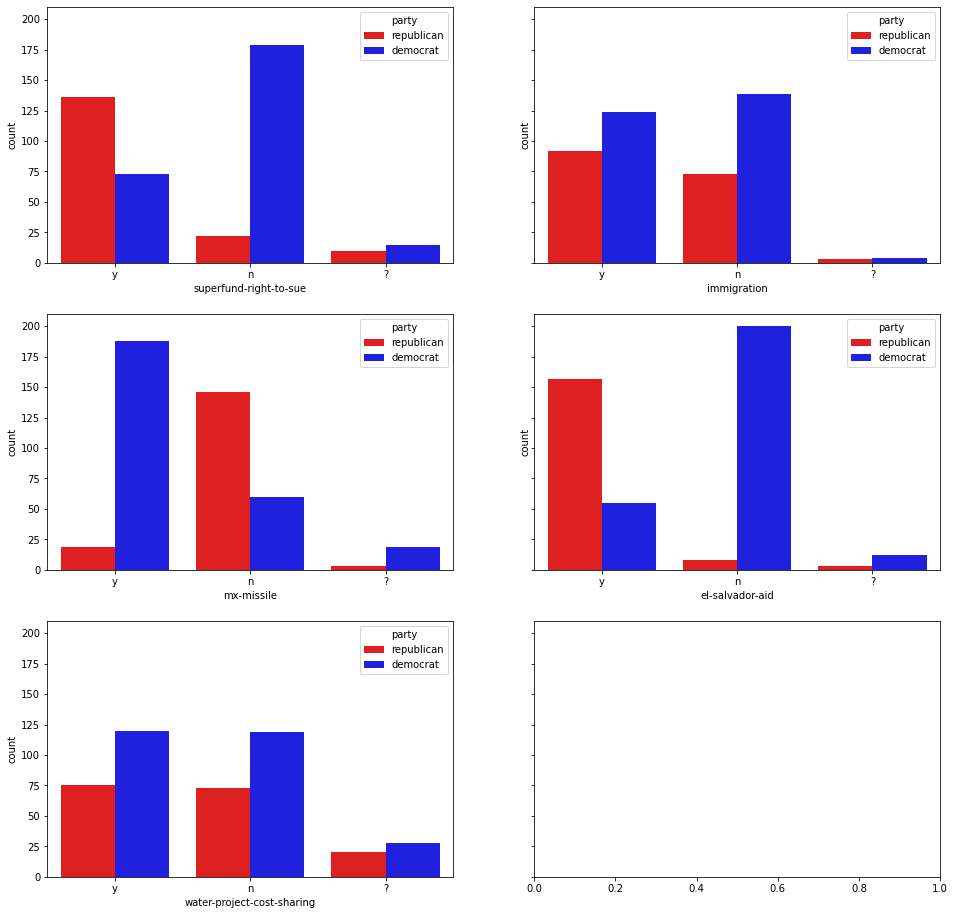

In [21]:
# To make republicans red and democrats blue
colors = ["r", "b"]
sns.set_palette(sns.color_palette(colors))

plt.tight_layout()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,16), sharey=True)

# same order of vote type for each graph
o = ['y', 'n', '?']

sns.countplot(ax=axes[0,0],order=o,x="superfund-right-to-sue", hue="party", data=df)
sns.countplot(ax=axes[1,0],order=o,x="mx-missile", hue="party", data=df)
sns.countplot(ax=axes[0,1],order=o,x="immigration", hue="party", data=df)
sns.countplot(ax=axes[1,1],order=o,x="el-salvador-aid", hue="party", data=df)
sns.countplot(ax=axes[2,0],order=o,x="water-project-cost-sharing", hue="party", data=df)
plt.show()

**Conclusion**: no real pattern

### Bills with no somewhat higher than yes

<Figure size 432x288 with 0 Axes>

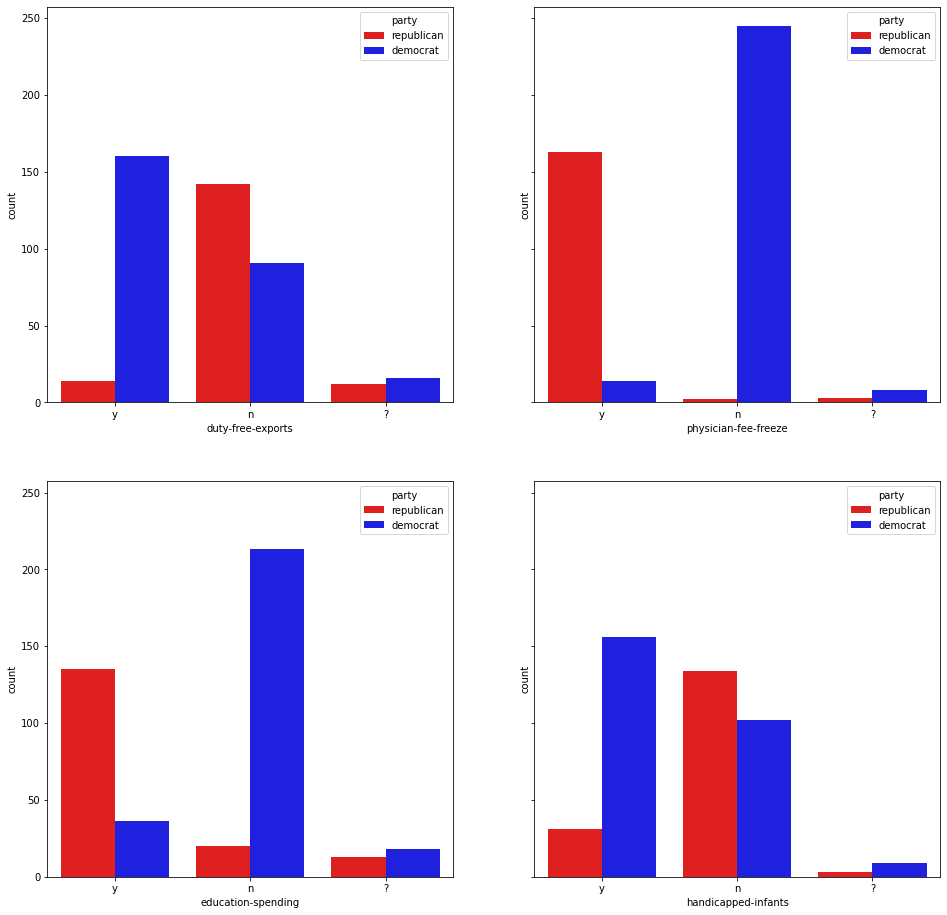

In [22]:
# To make republicans red and democrats blue
colors = ["r", "b"]
sns.set_palette(sns.color_palette(colors))

plt.tight_layout()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16), sharey=True)

# same order of vote type for each graph
o = ['y', 'n', '?']

sns.countplot(ax=axes[0,0],order=o,x="duty-free-exports", hue="party", data=df)
sns.countplot(ax=axes[1,0],order=o,x="education-spending", hue="party", data=df)
sns.countplot(ax=axes[0,1],order=o,x="physician-fee-freeze", hue="party", data=df)
sns.countplot(ax=axes[1,1],order=o,x="handicapped-infants", hue="party", data=df)
plt.show()

**Conclusion**: no real pattern